
## Appliance Energy Prediction


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("data"))

# Any results you write to the current directory are saved as output.

['KAG_energydata_complete.csv', 'KAG_energydata_complete.csv.zip']


# Reading the data

In [2]:
data = pd.read_csv("data/KAG_energydata_complete.csv")

In [3]:
data.head(10)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# Data Exploration 

In [5]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
print('The number of rows in dataset is - ' , data.shape[0])
print('The number of columns in dataset is - ' , data.shape[1])

The number of rows in dataset is -  19735
The number of columns in dataset is -  29


In [7]:
#Number of null values in all columns
data.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

### As shown above , there are no null values in the dataset 

In [8]:
from sklearn.model_selection import train_test_split

# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(data,test_size=0.25,random_state=40)

In [9]:
train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,97.835281,3.809202,21.685153,40.271333,20.343487,40.432370,22.268005,39.252994,20.857724,39.041339,...,19.484679,41.567732,7.422035,755.561311,79.744066,4.057009,38.345054,3.768053,25.014452,25.014452
std,102.928289,7.940816,1.605537,3.983201,2.199037,4.081775,1.999986,3.263513,2.040012,4.355528,...,2.010610,4.167305,5.304241,7.398129,14.952250,2.449080,11.785900,4.189370,14.539819,14.539819
min,10.000000,0.000000,16.790000,27.233333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.366667,24.500000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.745000,37.363333,18.790000,37.900000,20.790000,36.900000,19.533333,35.530000,...,18.000000,38.500000,3.700000,750.983333,70.000000,2.000000,29.000000,0.933333,12.469764,12.469764
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.560000,20.666667,38.400000,...,19.390000,40.900000,6.933333,756.100000,83.833333,3.666667,40.000000,3.450000,24.936900,24.936900
75%,100.000000,0.000000,22.600000,43.090000,21.533333,43.290000,23.290000,41.790000,22.100000,42.193333,...,20.600000,44.363333,10.433333,760.966667,91.666667,5.500000,40.000000,6.566667,37.736202,37.736202
max,1080.000000,60.000000,26.260000,63.360000,29.856667,56.026667,29.200000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.033333,772.300000,100.000000,14.000000,66.000000,15.500000,49.993173,49.993173


### Given this is not a timeseries problem and we will focus on predicting the appliance consumption  , we can ignore Date column

In [10]:
# Divide the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [11]:
# Seperate dependent and independent variables 

feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [12]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.685153,20.343487,22.268005,20.857724,19.589105,7.923834,20.264300,22.028348,19.484679,40.271333,...,41.567732,7.422035,3.768053,79.744066,755.561311,4.057009,38.345054,3.809202,25.014452,25.014452
std,1.605537,2.199037,1.999986,2.040012,1.842916,6.083047,2.105079,1.951399,2.010610,3.983201,...,4.167305,5.304241,4.189370,14.952250,7.398129,2.449080,11.785900,7.940816,14.539819,14.539819
min,16.790000,16.100000,17.200000,15.100000,15.335000,-6.065000,15.390000,16.306667,14.890000,27.233333,...,29.166667,-5.000000,-6.600000,24.500000,729.366667,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.745000,18.790000,20.790000,19.533333,18.290000,3.663333,18.700000,20.790000,18.000000,37.363333,...,38.500000,3.700000,0.933333,70.000000,750.983333,2.000000,29.000000,0.000000,12.469764,12.469764
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.028571,22.111111,19.390000,39.656667,...,40.900000,6.933333,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.936900,24.936900
75%,22.600000,21.533333,23.290000,22.100000,20.633333,11.293333,21.600000,23.390000,20.600000,43.090000,...,44.363333,10.433333,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.736202,37.736202
max,26.260000,29.856667,29.200000,26.200000,25.745000,28.290000,25.963333,27.230000,24.500000,63.360000,...,53.326667,26.033333,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


In [13]:
# Check the distribution of values in lights column

feature_vars.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

In [14]:
target_vars.describe()

,Appliances
count,14801.000000
mean,97.835281
std,102.928289
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


### Observations 

1. Temperature columns - Temperature inside the house varies between 14.89 Deg & 29.85 Deg , temperatire outside (T6) varies between  -6.06 Deg to 28.29 Deg . The reason for this variation is sensors are kept outside the house

2. Humidiy columns - Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.

3. Appliances - 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high

4. Lights column - Intially I believed lights column will be able to give useful information . With 11438 0 (zero) enteries in 14801 rows , this column will not add any value to the model . I believed light consumption along with humidity level in a room will give idea about human presence in the room and hence its impact on Appliance consumption. Hence for now , I will dropping this column 

In [15]:
# Due to lot of zero enteries this column is of not much use and will be ignored in rest of the model

_ = feature_vars.drop(['lights'], axis=1 , inplace= True) ;

In [16]:
feature_vars.head(10)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
9544,22.600000,19.500000,21.500000,22.890000,19.166667,2.863333,21.000000,22.890000,19.890000,34.700000,...,38.500000,37.260000,2.233333,0.400000,87.666667,764.200000,1.333333,61.000000,43.195492,43.195492
19366,23.700000,21.000000,25.390000,23.600000,19.890000,5.500000,23.000000,24.200000,22.600000,40.290000,...,43.400000,44.590000,6.266667,5.300000,93.666667,757.233333,1.000000,25.333333,46.369677,46.369677
10816,22.200000,20.463333,23.000000,20.390000,19.856667,13.566667,20.890000,23.633333,19.963333,45.800000,...,43.800000,41.363333,13.366667,7.133333,66.333333,750.133333,6.333333,40.000000,25.722968,25.722968
15457,21.290000,18.230000,21.290000,20.533333,19.290000,0.066667,19.500000,22.200000,18.890000,35.790000,...,42.950000,35.863333,0.316667,-0.450000,94.333333,755.216667,2.000000,20.166667,3.791656,3.791656
2956,21.290000,20.290000,21.666667,18.790000,19.475556,10.800000,19.044444,20.926667,17.600000,47.400000,...,57.500000,52.900000,10.766667,9.633333,92.666667,758.666667,6.666667,59.000000,8.706206,8.706206
13954,22.890000,21.790000,22.963333,22.100000,20.730000,11.233333,21.790000,22.790000,21.000000,38.560000,...,34.760000,39.790000,8.933333,4.366667,73.333333,756.166667,4.333333,40.000000,17.632673,17.632673
17433,25.500000,25.390000,26.290000,25.790000,24.000000,16.754000,25.200000,26.600000,24.100000,50.530000,...,49.400000,49.064286,20.150000,12.200000,60.000000,746.000000,3.000000,40.000000,4.533370,4.533370
6512,22.000000,20.600000,21.600000,21.890000,19.700000,2.500000,19.200000,21.700000,17.890000,37.966667,...,38.560000,36.200000,2.133333,0.700000,90.666667,757.300000,1.000000,64.666667,35.068986,35.068986
5664,19.666667,17.823333,20.832857,18.000000,17.100000,5.866667,18.000000,19.533333,17.600000,36.833333,...,39.560000,38.400000,6.300000,2.000000,74.000000,756.700000,9.000000,40.000000,30.961960,30.961960
2845,20.963333,20.356667,20.566667,20.533333,17.500000,6.726667,16.890000,19.390000,16.790000,42.230000,...,50.878889,46.345000,6.100000,4.983333,92.833333,753.666667,5.000000,40.000000,13.977444,13.977444


# Data Visualization

In [17]:
# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= data.date  ,  mode = "lines", y = data.Appliances )
layout = go.Layout(title = 'Appliance energy consumption measurement' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [18]:
# Adding column to mark weekdays (0) and weekends(1) for time series evaluation , 
# decided not to use it for model evaluation as it has least impact

data['WEEKDAY'] = ((pd.to_datetime(data['date']).dt.dayofweek)// 5 == 1).astype(float)

# There are 5472 weekend recordings 

data['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [19]:
# Find rows with weekday 

temp_weekday =  data[data['WEEKDAY'] == 0]

# To understand the timeseries variation of the applaince energy consumption

visData = go.Scatter( x= temp_weekday.date  ,  mode = "lines", y = temp_weekday.Appliances )
layout = go.Layout(title = 'Appliance energy consumption measurement on weekdays' , 
    xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [20]:
# Find rows with weekday 

temp_weekend =  data[data['WEEKDAY'] == 1]

# To understand the timeseries variation of the applaince energy consumption

visData = go.Scatter( x= temp_weekend.date  ,  mode = "lines", y = temp_weekend.Appliances )
layout = go.Layout(title = 'Appliance energy consumption measurement on weekend' , 
    xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

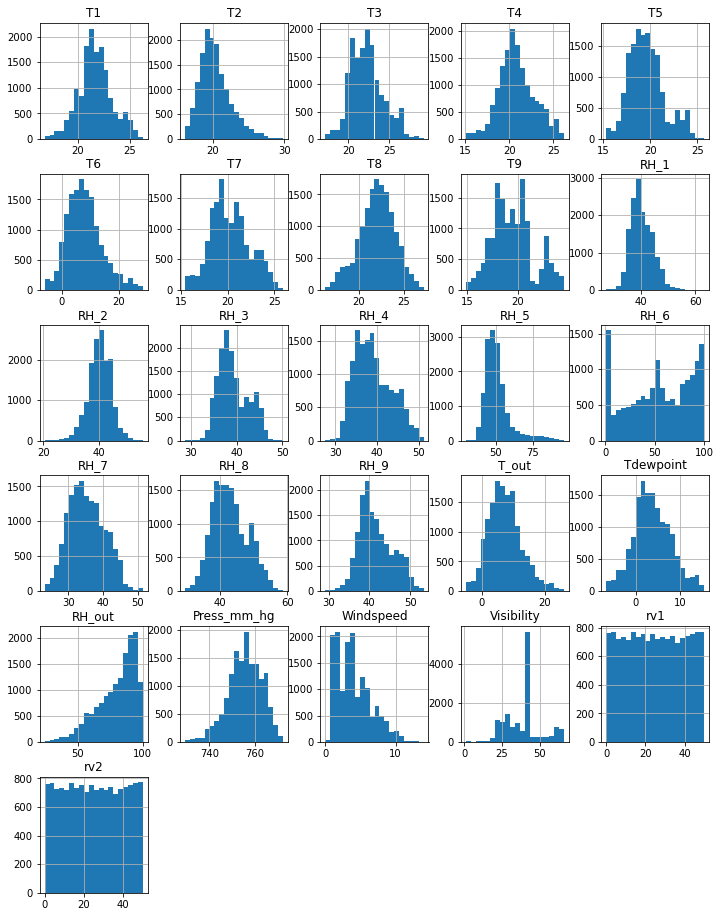

In [21]:
# Histogram of all the features to understand the distribution

feature_vars.hist(bins = 20 , figsize= (12,16)) ;

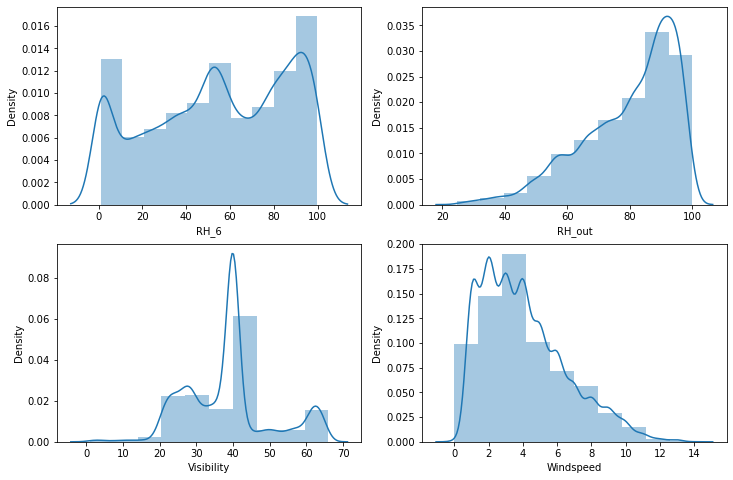

In [22]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution

f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])

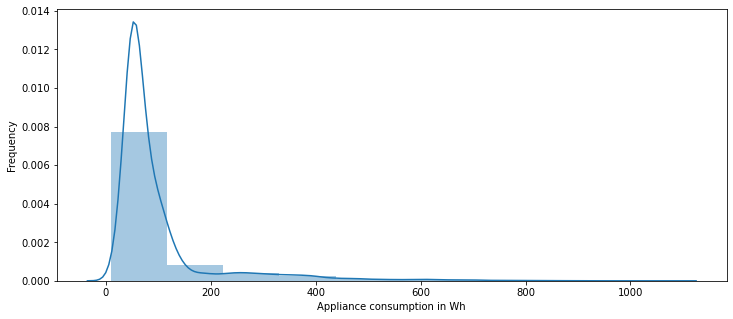

In [23]:
# Distribution of values in Applainces column

f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;

### Observations 

1. Temperature - All the columns follow normal distribution except T9
2. Humidity - All columns follow normal distribution except RH_6 and RH_out , primarly because these sensors are outside the house 
3. Appliance - This column is postively skewed , most the values are around mean 100 Wh . There are outliers in this column 
4. Visibilty - This column is negatively skewed
5. Windspeed - This column is postively skewed


In [24]:
#Appliance column range with consumption less than 200 Wh

print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

Percentage of the appliance consumption is less than 200 Wh
Appliances    90.250659
dtype: float64


### Correlation Plots

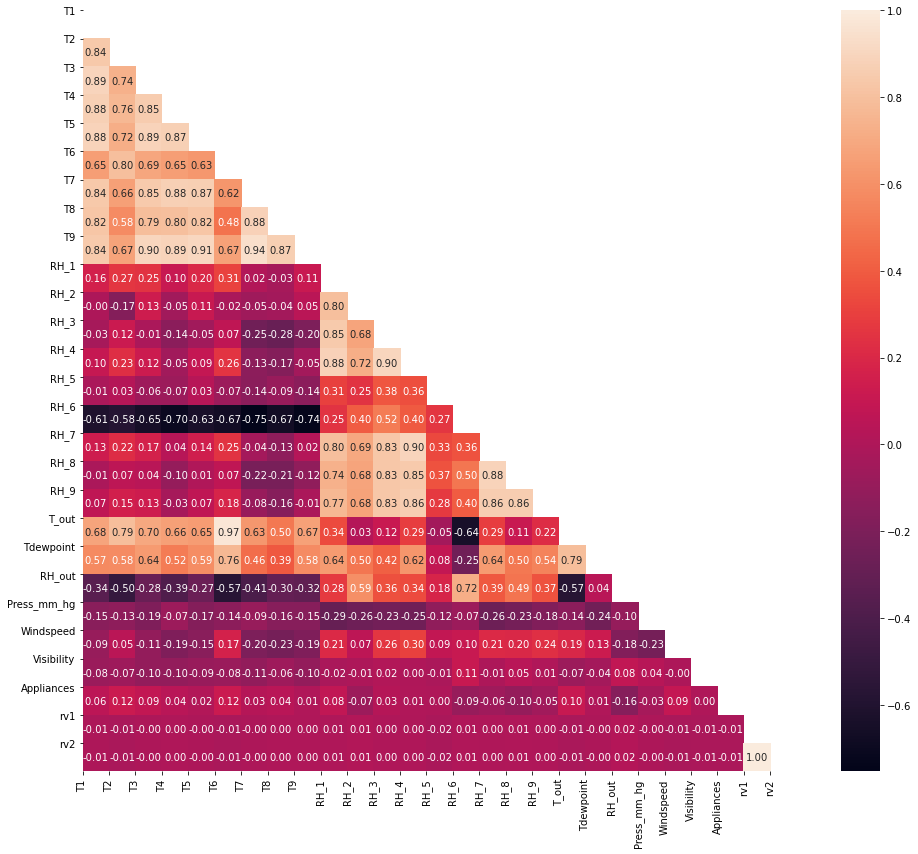

In [25]:
# Use the weather , temperature , applainces and random column to see the correlation

train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()


# Mask the repeated values

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))


#Generate Heat Map, allow annotations and place floats in map

sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [26]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974683
T7    T9       0.943921
T5    T9       0.910009
T3    T9       0.900209
RH_3  RH_4     0.899889
RH_4  RH_7     0.895120
T1    T3       0.892292
T4    T9       0.888264
T3    T5       0.887545
RH_7  RH_8     0.884849
T1    T5       0.884692
T7    T8       0.881513
RH_1  RH_4     0.880504
T1    T4       0.876682
T4    T7       0.876677
      T5       0.871733
T5    T7       0.869655
T8    T9       0.868251
RH_7  RH_9     0.860155
RH_4  RH_9     0.858454
RH_8  RH_9     0.857476
T3    T4       0.851790
RH_4  RH_8     0.848829
T3    T7       0.846021
RH_1  RH_3     0.845592
T1    T9       0.842862
      T7       0.837079
      T2       0.835729
RH_3  RH_9     0.834419
      RH_7     0.833924
      RH_8     0.831060
T1    T8       0.824657
T5    T8       0.824057
T2    T6       0.801219
RH_1  RH_7     0.800827
      RH_2     0.797598
T4    T8       0.796458
T3    T8       0.794213
T2    T_out    0.791553
dtype: float64

### Observations based on correlation plot

1. Temperature - All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . For the indoortemperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air tempera-ture differences between rooms. Four columns have a high degree of correlation with T9 - T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

2. Weather attributes - Visibility, Tdewpoint, Press_mm_hg  have low correlation values

3. Humidity - There are no significantly high  correlation cases (> 0.9) for humidity sensors.

4. Random variables have no role to play


# Data Pre Processing

In [27]:
#Split training dataset into independent and dependent varibales

train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

In [28]:
#Split testing dataset into independent and dependent varibales

test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [29]:
# Due to conlusion made above below columns are removed

train_X.drop(["rv1","rv2","Visibility","T6","T9"],axis=1 , inplace=True)

In [30]:
# Due to conlusion made above below columns are removed

test_X.drop(["rv1","rv2","Visibility","T6","T9"], axis=1, inplace=True)

In [31]:
train_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [32]:
test_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + col_target ]

test = test[list(test_X.columns.values) + col_target ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)


In [34]:
sc_train.head(15)

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160,-0.270443
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270,-0.464759
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492,0.021032
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-0.561918
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602,-0.464759
13954,0.750458,0.657816,0.347678,0.608976,0.619092,0.724795,0.390324,-0.429652,-0.816430,-0.610710,...,-1.320081,-1.474694,-1.561794,-0.426605,0.284932,0.142894,-0.428762,0.081828,0.112832,0.021032
17433,2.376137,2.294952,2.011079,2.417850,2.393514,2.344741,2.342836,2.575570,1.701677,2.087174,...,-0.507243,1.877119,1.231986,1.798958,2.399664,2.012768,-1.320519,-1.292439,-0.431609,0.021032
6512,0.196107,0.116652,-0.334016,0.506032,0.060176,-0.505604,-0.168268,-0.578616,-0.497930,-0.509589,...,0.760522,-0.352786,-0.836633,-1.288102,-0.997104,-0.732367,0.730523,0.235025,-1.248270,-0.367601
5664,-1.257245,-1.146065,-0.717603,-1.400884,-1.350680,-1.075673,-1.278621,-0.863154,-0.579597,-0.832214,...,0.493962,-0.781292,-0.645801,-0.760165,-0.211543,-0.422047,-0.384174,0.153921,2.018373,-0.367601
2845,-0.449596,0.005994,-0.850704,-0.159019,-1.133625,-1.602987,-1.352075,0.491749,0.170102,1.095075,...,1.453771,0.906440,1.514205,1.146407,-0.249250,0.290097,0.875434,-0.256106,0.385052,0.312507


In [35]:
sc_test.head(15)

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
6314,-0.678526,-0.337714,-0.758967,-0.272083,-0.811540,-0.409392,-0.946375,-0.352449,-0.426736,0.306431,...,1.086122,-0.407472,-0.731388,-0.437093,-0.232839,-1.157146,-1.318014,0.377392,-0.809142,-0.367942
12257,0.814344,0.289201,1.432662,0.317741,1.062631,0.811654,1.049857,0.671740,1.084770,-0.220306,...,-1.056634,-0.276865,-0.989635,-0.554766,0.865496,0.485626,-0.967649,-0.401660,0.004891,3.087003
6271,-0.850621,-1.058130,-0.526796,-0.515812,-0.654758,-0.600348,-0.929458,-0.182731,0.160016,0.427270,...,0.869462,0.702690,0.538598,0.705174,-1.611203,-1.275901,1.191050,0.616061,-0.876978,-0.664080
18179,0.938750,0.485399,0.955147,1.146419,1.134714,1.502863,1.400044,-0.419664,-0.511502,-0.885589,...,-1.365905,-0.346975,-0.678579,-1.043214,0.591690,0.568755,-0.323430,0.701622,-1.216158,-0.565367
9661,0.005706,-0.368370,-0.396714,-0.137220,-0.595289,-0.270881,0.339334,-0.797748,-0.320955,-1.037265,...,0.039148,-1.025548,-1.028276,-1.198139,-0.307513,-0.001268,0.524227,0.917775,0.004891,0.224334
2134,-1.120167,-0.521650,-0.872583,-0.852158,-1.129909,-1.306349,-1.995243,1.329607,1.166585,1.607781,...,1.374145,1.612983,1.369369,1.753093,0.557465,0.964603,0.309487,0.868240,1.497285,-0.466655
13026,0.192315,-0.337714,0.461166,0.186127,0.426494,0.948148,0.034824,-0.258348,0.499671,0.179394,...,-0.925428,0.542399,-0.938630,0.556516,0.320996,0.228325,-0.391242,-0.703374,0.411908,-0.367942
1826,-2.233599,-1.320238,-1.350098,-0.592180,-2.276637,-2.200617,-2.055299,1.589225,0.911224,2.246063,...,1.454722,1.155418,1.820068,1.688105,-0.151942,0.473751,1.010216,1.647292,0.547580,1.902451
17094,1.747387,3.184658,1.893711,1.921477,1.837528,1.752989,0.892527,-0.265279,-1.699409,-0.623105,...,-1.724454,0.128526,-0.547201,-0.196524,2.206523,1.344618,-1.815305,-0.352125,0.004891,-0.367942
6752,-0.678526,-0.383698,-0.559728,-0.169717,-0.865602,0.132548,0.034824,-0.686844,-1.037453,-0.201716,...,-0.941179,-1.217407,-1.225986,-0.551110,-0.189279,-1.750919,-2.063951,-0.626820,1.090269,1.211462


In [36]:
# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [37]:
train_X.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_5,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,2.267242,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-1.454588,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,-0.101804,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,1.009651,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,0.137914,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602


In [38]:
train_y.head(15)

9544    -0.270443
19366   -0.464759
10816    0.021032
15457   -0.561918
2956    -0.464759
13954    0.021032
17433    0.021032
6512    -0.367601
5664    -0.367601
2845     0.312507
336     -0.464759
17761   -0.270443
19262    0.118190
16448   -0.464759
2575    -0.464759
Name: Appliances, dtype: float64

# Model Implementation

We will be looking at following Algorithms 

**Improved Linear regression models**

1.Ridge regression 

2.Lasso regression 

**Support Vector Machine**

3.Support vector regression 

**Nearest neighbour Regressor**

4.KNeighborsRegressor

**Ensmble models**

5.Random Forest Regressor

6.Gradient Boosting Regressor

7.ExtraTrees Regressor

**Neural Network**

8.Multi Layer Preceptron Regressor



In [39]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR


In [40]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',
              learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]


In [41]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [42]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.016997098922729492,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 1.0},
 {'Name': 'Ridge: ',
  'Train_Time': 0.01699352264404297,
  'Train_R2_Score': 0.1375528613228284,
  'Test_R2_Score': 0.12139099895516814,
  'Test_RMSE_Score': 0.937341453817568},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.0,
  'Train_R2_Score': 0.6814849332193325,
  'Test_R2_Score': 0.4855598647200512,
  'Test_RMSE_Score': 0.7172448224141802},
 {'Name': 'SVR:',
  'Train_Time': 12.33329153060913,
  'Train_R2_Score': 0.23572363185689527,
  'Test_R2_Score': 0.20993387920257778,
  'Test_RMSE_Score': 0.8888566368078837},
 {'Name': 'RandomForest ',
  'Train_Time': 35.7763237953186,
  'Train_R2_Score': 0.9393208146439452,
  'Test_R2_Score': 0.5573445355040687,
  'Test_RMSE_Score': 0.6653235787915015},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 8.426524877548218,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.6290452743728374,
  'Test_RMSE_Score

In [43]:
# Convert list to dataframe

df = pd.DataFrame(model_data)

In [44]:
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.016997,0.000000,0.000000,1.000000
1,Ridge:,0.016994,0.137553,0.121391,0.937341
2,KNeighborsRegressor:,0.000000,0.681485,0.485560,0.717245
3,SVR:,12.333292,0.235724,0.209934,0.888857
4,RandomForest,35.776324,0.939321,0.557345,0.665324
5,ExtraTreeRegressor :,8.426525,1.000000,0.629045,0.609061
6,GradientBoostingClassifier:,6.432128,0.333526,0.231988,0.876363
7,XGBRegressor:,3.127953,0.844009,0.458513,0.735858
8,MLPRegressor:,2.449450,0.298567,0.243178,0.869955


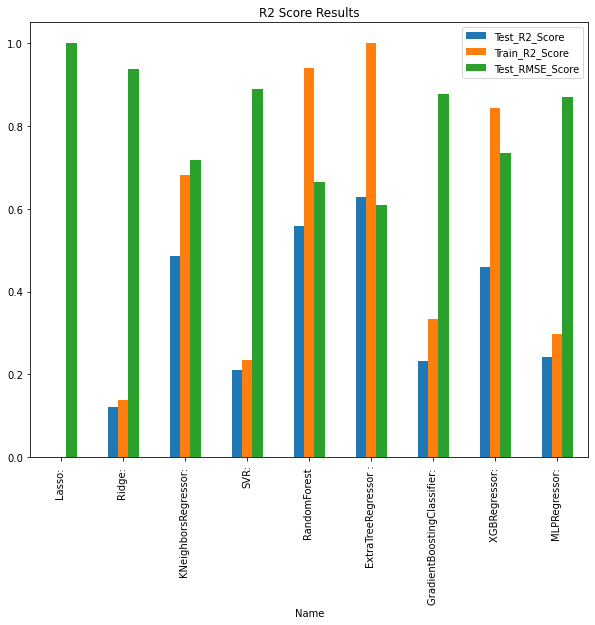

In [45]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], \
    kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

### Obervations

1. Best results over test set are given by Extra Tree Regressor with R2 score of 0.57
2. Least RMSE score is also by Extra Tree Regressor 0.65
2. Lasso regularization over Linear regression was worst performing model


# Parameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80],                          # [80, 150, 200,250]
              'n_estimators' : [200],                     # [100,150,200,250]
              'max_features': ["auto", "sqrt"]    # ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80], 'max_features': ['auto', 'sqrt'],
                          'n_estimators': [200]}],
             scoring='r2', verbose=2)

In [47]:
# Tuned parameter set

grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 200}

In [48]:
# Best possible parameters for ExtraTreesRegressor

grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=200,
                    random_state=40)

In [49]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(train_X,train_y)

1.0

In [50]:
# R2 score on test set with tuned parameters

grid_search.best_estimator_.score(test_X,test_y)

0.6371620865118863

In [51]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.6023602854505878

### Observations

Based on parameter tunning step we can see that 

1. Best possible parameter combination are - 'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 200

    
2. Training set  R2 score of 1.0 may be signal of overfitting on training set 


3. Test set R2 score is 0.63 improvement over 0.57 achieved using untuned model


4. Test set RMSE score is 0.60 improvement over 0.65 achieved using untuned model 




### Feature Importance 

In [52]:
# Get sorted list of features in order of importance

feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

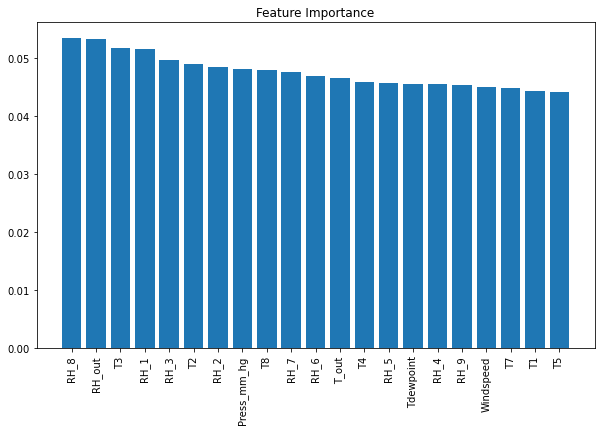

In [53]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [train_X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(train_X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [54]:
# Get top 5 most important feature 

names[0:5]

['RH_8', 'RH_out', 'T3', 'RH_1', 'RH_3']

In [55]:
# Get 5 least important feature 

names[-5:]

['RH_9', 'Windspeed', 'T7', 'T1', 'T5']

In [56]:
# Reduce test & training set to 5 feature set

train_important_feature = train_X[names[0:5]]
test_important_feature = test_X[names[0:5]]

In [57]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_important_feature , train_y)

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=200,
                    random_state=40)

In [58]:
# Reduced dataset scores 

print('Training set R2 Score - ', metrics.r2_score(train_y,
    cloned_model.predict(train_important_feature)))
print('Testing set R2 Score - ', metrics.r2_score(test_y,
    cloned_model.predict(test_important_feature)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(test_y, 
    cloned_model.predict(test_important_feature))))


Training set R2 Score -  0.9999837366892088
Testing set R2 Score -  0.4751840397345243
Testing set RMSE Score -  0.7244418266951983


### Observations 

1. Based on parameter tunning step we can see that 

    a. 5 most important features are - 'RH_out', 'RH_8', 'RH_1', 'T3', 'RH_3'
    
    b. 5 least important features are - 'T7','Tdewpoint','Windspeed','T1','T5'
    

2. As can be observed with R2 Score , compared to Tuned model 0.63 the R2 score has come down to 0.47 which is decrease of 16% .


3. The reduction in R2 score is high and we should not use reduced feature set for this data set

# Conclusion

1. The best Algorithm to use for this dataset Extra Trees Regressor

2. The untuned model was able to explain 57% of variance on test set .

3. The tuned model was able to explain 63% of varaince on tese set which is improvement of 10%

4. The final model had 22 features 

5. Feature reduction was not able to add to better R2 score 

